In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
biggraph = pd.read_csv('biggraph.csv')

In [3]:
biggraph

,Unnamed: 0,First,Second,Direction,Citation
0,0,H4K16ac,Epigenetic Alteration,1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
1,0,H4K20me3,Epigenetic Alteration,1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
2,0,H3K4me3,Epigenetic Alteration,1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
3,0,H3K9me,Epigenetic Alteration,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
4,0,H3K27me3,Epigenetic Alteration,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
5,0,HP1a,Epigenetic Alteration,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
6,0,NuRD,Epigenetic Alteration,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
7,0,LMNA,Genomic Instability,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
8,0,Genomic Instability,mtDNA,-1,http://www.cell.com/cell/pdf/S0092-8674(13)006...
9,0,Shelterin,Telomere Attrition,1,http://www.cell.com/cell/pdf/S0092-8674(13)006...


In [4]:
nodes = np.unique(np.concatenate((biggraph['First'].unique(), biggraph['Second'].unique())))

In [5]:
len(nodes)

137

In [6]:
bigmatrix = np.zeros((len(nodes), len(nodes)))

In [7]:
nodesdict = dict(zip(nodes, range(len(nodes))))

In [8]:
for index, row in biggraph.iterrows():
    first = row['First']
    second = row['Second']
    value = row['Direction']
    i = nodesdict[first]
    j = nodesdict[second]
    bigmatrix[i, j] = value

In [9]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from([(row['First'], row['Second']) for index, row in biggraph.iterrows()])

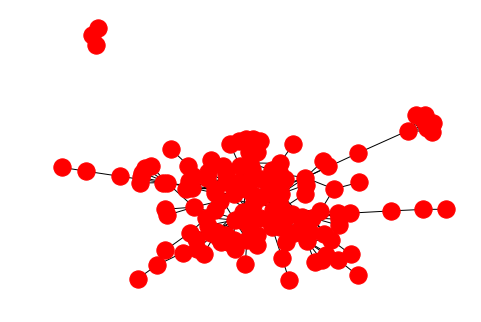

In [10]:
nx.draw(graph)
plt.show()

In [11]:
list(nx.connected_components(graph))

[{'AMPK',
  'ATF6',
  'Acetyl-CoA',
  'Adipogenesis',
  'Adiponectin',
  'Akt',
  'Altered Intercellular Communication',
  'Apoptosis',
  'Aromatase',
  'Autophagy',
  'BAD',
  'BMAL1',
  'CD28',
  'CD38',
  'CDC25',
  'CLOCK',
  'CRTC-1',
  'CaMKKb',
  'Cancerous Cells',
  'Cell Loss and Atrophy',
  'Cellular Senescence',
  'Death-Resistant Cells',
  'Dysregulated Nutrient Sensing',
  'ERRa',
  'Epigenetic Alteration',
  'ErK',
  'Estrogen',
  'Extracellular Crosslinks',
  'Extracellular Junk',
  'FOXO1',
  'GH',
  'GM-CSF',
  'GSK3',
  'Genomic Instability',
  'Gluconeogenesis',
  'Glycolysis',
  'GnRH',
  'H2AX',
  'H3K27me3',
  'H3K4me3',
  'H3K9me',
  'H4K16ac',
  'H4K20me3',
  'HI1-a',
  'HIF-1a',
  'HIF1-a',
  'HK39 deacetylation',
  'HNF1a',
  'HP1a',
  'HSF1',
  'HSP90',
  'Hsp60',
  'Hsp7',
  'IFN-a',
  'IGF-1',
  'IL-1a',
  'IL-1b',
  'IL-2',
  'IL-6',
  'IRE1',
  'Insulin',
  'Insulin Sensitivity',
  'Intracellular Junk',
  'Klotho',
  'LAMP2a',
  'LAT',
  'LKB1',
  'LMNA',

In [12]:
#so far, three connected components: epigenetic alteration, telomere attrition, and everything else.

In [13]:
U, S, V = np.linalg.svd(np.transpose(bigmatrix))

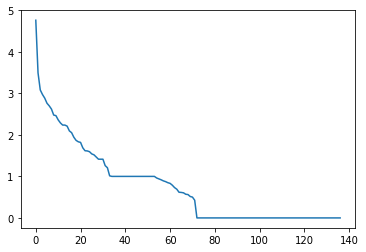

In [14]:
plt.plot(S)

In [15]:
S

array([4.76093354e+00, 3.49352158e+00, 3.08160893e+00, 2.97122992e+00,
       2.88446873e+00, 2.76212728e+00, 2.69922089e+00, 2.62129844e+00,
       2.47729969e+00, 2.46316043e+00, 2.36165745e+00, 2.28824561e+00,
       2.23606798e+00, 2.23606798e+00, 2.21065382e+00, 2.09612999e+00,
       2.05288084e+00, 1.94332962e+00, 1.86776236e+00, 1.83340580e+00,
       1.81917518e+00, 1.68857490e+00, 1.61803399e+00, 1.61333583e+00,
       1.59462893e+00, 1.54195622e+00, 1.51944629e+00, 1.46731399e+00,
       1.41421356e+00, 1.41421356e+00, 1.41402961e+00, 1.25968323e+00,
       1.20864020e+00, 1.01296106e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.61769762e-01, 9.39812273e-01,
      

In [16]:
def eigencluster(number):
    nodes = []
    for node in nodesdict.keys():
        if abs(V[number][nodesdict[node]]) > 0.1:
            nodes.append(node)
            
    return nodes

In [17]:
eigencluster(0)

['AMPK', 'Genomic Instability', 'LMNA', 'SIRT1']

In [18]:
eigencluster(1)

['AMPK', 'Akt', 'BMAL1', 'HI1-a', 'NAD+', 'PARP1', 'PRAS40', 'SIRT1', 'TSC']

In [19]:
eigencluster(2)

['AMPK',
 'BMAL1',
 'CD38',
 'CLOCK',
 'IFN-a',
 'IL-1b',
 'IL-6',
 'NFkB',
 'NMN',
 'NR',
 'PARP1',
 'PRDM13',
 'Superoxide',
 'TNF-a']

In [20]:
eigencluster(3)

['AMPK',
 'FOXO1',
 'Genomic Instability',
 'HSP90',
 'IL-6',
 'NFkB',
 'Neural stem cells',
 'PARP1',
 'PTEN',
 'SIRT1',
 'SOD2',
 'Superoxide',
 'Thymic Atrophy',
 'Wnt']

In [21]:
eigencluster(4)

['AMPK',
 'BMAL1',
 'CD38',
 'CLOCK',
 'FOXO1',
 'Genomic Instability',
 'HSP90',
 'IFN-a',
 'IL-1b',
 'IL-6',
 'NFkB',
 'NMN',
 'NR',
 'Neural stem cells',
 'PARP1',
 'PRDM13',
 'PTEN',
 'SIRT1',
 'SOD2',
 'Superoxide',
 'TNF-a',
 'Thymic Atrophy',
 'Wnt']

In [22]:
eigencluster(5)

['AMPK',
 'Akt',
 'Death-Resistant Cells',
 'GSK3',
 'IL-6',
 'Leptin',
 'MAPK',
 'NAD+',
 'NFkB',
 'NO',
 'PARP1',
 'Ras',
 'TRL4',
 'p16',
 'p53']

In [23]:
list(zip(nodes, V[0]))

[('AMPK', -0.3271976926080174),
 ('ATF6', -1.1102230246251565e-16),
 ('Acetyl-CoA', 1.1102230246251565e-16),
 ('Adipogenesis', 0.006602520878404211),
 ('Adiponectin', -0.04891361060700103),
 ('Akt', 0.09874456199521954),
 ('Altered Intercellular Communication', -5.421010862427522e-20),
 ('Apoptosis', -6.776263578034403e-21),
 ('Aromatase', 8.470329472543003e-22),
 ('Autophagy', 3.1801852004662706e-18),
 ('BAD', -3.970466940254533e-23),
 ('BMAL1', -0.08117447559021848),
 ('CD28', 0.0),
 ('CD38', 0.012432661162285056),
 ('CDC25', -3.2311742677852644e-27),
 ('CLOCK', -0.05663635731306873),
 ('CRTC-1', 0.0),
 ('CaMKKb', -0.04891361060700102),
 ('Cancerous Cells', 0.0),
 ('Cell Loss and Atrophy', -1.232595164407831e-32),
 ('Cellular Senescence', 5.97418846517054e-28),
 ('Death-Resistant Cells', 0.00517464073325199),
 ('Dysregulated Nutrient Sensing', 0.0),
 ('ERRa', -0.01510155640322331),
 ('Epigenetic Alteration', 0.0),
 ('ErK', 0.0),
 ('Estrogen', -0.001291916645492313),
 ('Extracellular 

In [24]:
np.linalg.matrix_rank(np.transpose(bigmatrix))

72

In [25]:
#long-term, increased AMPK causes less stem cell exhaustion and not much to other hallmarks

In [26]:
#let's look for things that send up hallmarks of aging

In [27]:
def drivers(hallmark):
    j = nodesdict[hallmark]
    for i in range(len(nodes)):
        if abs(np.dot(np.linalg.matrix_power(np.transpose(bigmatrix), 101), np.eye(len(nodes))[i])[j]) != 0:
            print(nodes[i])
            print(np.dot(np.linalg.matrix_power(np.transpose(bigmatrix), 101), np.eye(len(nodes))[i])[j])

In [28]:
drivers('Altered Intercellular Communication')

AMPK
-3.2547022176499846e+25
Acetyl-CoA
-1.540823751279439e+25
Adiponectin
-1.792852675751582e+25
Akt
-1.9067843506992572e+24
Aromatase
-5.7858646074580086e+23
BMAL1
-2.3440579496880146e+25
CD28
-7.541502534923007e+23
CD38
1.798368676019967e+25
CLOCK
-2.3440579496880146e+25
CaMKKb
-1.792852675751582e+25
Cellular Senescence
-3.4615310776720806e+24
Death-Resistant Cells
-1.9067843506992572e+24
Estrogen
-1.0503521356557282e+24
GH
-8.973008053873547e+23
HSP90
-1.0503521356557282e+24
IGF-1
-1.628938596401529e+24
IL-6
-5.131347307032721e+24
Klotho
7.541502534923007e+23
LAT
2.826602599689319e+24
LKB1
-1.792852675751582e+25
LMNA
5.560739982676744e+23
LcK
1.5570340065698013e+24
Leptin
-5.131347307032721e+24
MAPK
5.131347307032721e+24
Melatonin
4.942781373880537e+23
NAD+
-3.264715833687091e+25
NAMPT
-9.906313626191656e+24
NFkB
9.31532617577219e+24
NMN
-1.798368676019967e+25
NO
-5.131347307032721e+24
NR
-1.798368676019967e+25
PARP1
2.31150340672324e+25
PCAF
-2.7971748867734802e+25
PI3K
-1.0503521

In [29]:
#biggest drivers: SIRT1, NAD+, PCAF, AMPK

In [30]:
drivers('Cellular Senescence')

AMPK
-1.249720078730303e+25
Acetyl-CoA
-5.916358090506992e+24
Adiponectin
-6.884082896867471e+24
Akt
-7.321550573671903e+23
Aromatase
-2.221619886926724e+23
BMAL1
-9.000566225525972e+24
CD28
-2.8957386917251187e+23
CD38
6.905262887627628e+24
CLOCK
-9.000566225525972e+24
CaMKKb
-6.884082896867471e+24
Cellular Senescence
-1.3291369230201426e+24
Death-Resistant Cells
-7.321550573671903e+23
Estrogen
-4.033076041634421e+23
GH
-3.4453991737635306e+23
HSP90
-4.033076041634421e+23
IGF-1
-6.254695928561143e+23
IL-6
-1.970302452175431e+24
Klotho
2.8957386917251187e+23
LAT
1.0853410810568475e+24
LKB1
-6.884082896867471e+24
LMNA
2.1351779499992194e+23
LcK
5.978601208809672e+23
Leptin
-1.970302452175431e+24
MAPK
1.970302452175431e+24
Melatonin
1.8978980916352013e+23
NAD+
-1.2535650440098898e+25
NAMPT
-3.8037639750005125e+24
NFkB
3.5768403323205265e+24
NMN
-6.905262887627628e+24
NO
-1.970302452175431e+24
NR
-6.905262887627628e+24
PARP1
8.87556533980306e+24
PCAF
-1.0740416130127524e+25
PI3K
-4.033076

In [31]:
#Biggest drivers: SIRT1, NAD+, PCAF, AMPK

In [32]:
drivers('Dysregulated Nutrient Sensing')

AMPK
-5.140079054544419e+24
Acetyl-CoA
-2.4333887898397704e+24
Adiponectin
-2.831412482696654e+24
Akt
-3.011342251041725e+23
Aromatase
-9.137487700097128e+22
BMAL1
-3.701918751427119e+24
CD28
-1.1910127755888313e+23
CD38
2.8401237796290594e+24
CLOCK
-3.701918751427119e+24
CaMKKb
-2.831412482696654e+24
Cellular Senescence
-5.4667192877172845e+23
Death-Resistant Cells
-3.011342251041725e+23
Estrogen
-1.658797841199457e+23
GH
-1.4170872685035021e+23
HSP90
-1.658797841199457e+23
IGF-1
-2.5725466112091705e+23
IL-6
-8.103823038384667e+23
Klotho
1.1910127755888313e+23
LAT
4.4639908190055286e+23
LKB1
-2.831412482696654e+24
LMNA
8.781953371265506e+22
LcK
2.4589892866340368e+23
Leptin
-8.103823038384667e+23
MAPK
8.103823038384667e+23
Melatonin
7.80602504072907e+22
NAD+
-5.155893336346808e+24
NAMPT
-1.5644821483700057e+24
NFkB
1.471148810563324e+24
NMN
-2.8401237796290594e+24
NO
-8.103823038384667e+23
NR
-2.8401237796290594e+24
PARP1
3.6505060834675263e+24
PCAF
-4.417516284418606e+24
PI3K
-1.6587

In [33]:
#biggest drivers: SIRT1, NAD+, PCAF, AMPK

In [34]:
drivers("Epigenetic Alteration")

In [35]:
drivers("Genomic Instability")

AMPK
-1.5134703232699257e+25
Acetyl-CoA
-7.164990420028854e+24
Adiponectin
-8.336951085817906e+24
Akt
-8.866745203322897e+23
Aromatase
-2.6904871144160538e+23
BMAL1
-1.0900112838707937e+25
CD28
-3.506876978661432e+23
CD38
8.362601059766645e+24
CLOCK
-1.0900112838707937e+25
CaMKKb
-8.336951085817906e+24
Cellular Senescence
-1.609647890588352e+24
Death-Resistant Cells
-8.866745203322897e+23
Estrogen
-4.884246483988118e+23
GH
-4.172541907631221e+23
HSP90
-4.884246483988118e+23
IGF-1
-7.57473359840417e+23
IL-6
-2.3861297741679384e+24
Klotho
3.506876978661432e+23
LAT
1.3143995561585867e+24
LKB1
-8.336951085817906e+24
LMNA
2.5858018265275727e+23
LcK
7.240369790165074e+23
Leptin
-2.3861297741679384e+24
MAPK
2.3861297741679384e+24
Melatonin
2.2984446574605455e+23
NAD+
-1.5181267586939141e+25
NAMPT
-4.606538688836204e+24
NFkB
4.331723388442621e+24
NMN
-8.362601059766645e+24
NO
-2.3861297741679384e+24
NR
-8.362601059766645e+24
PARP1
1.0748730833934582e+25
PCAF
-1.300715364118407e+25
PI3K
-4.8842

In [36]:
drivers("Loss of Proteostasis")

AMPK
-2.1786875297907634e+25
Acetyl-CoA
-1.0314226211889252e+25
Adiponectin
-1.2001299984464615e+25
Akt
-1.276395506888765e+24
Aromatase
-3.8730397518317507e+23
BMAL1
-1.5691050924405744e+25
CD28
-5.048258313657746e+23
CD38
1.2038223918500455e+25
CLOCK
-1.5691050924405744e+25
CaMKKb
-1.2001299984464615e+25
Cellular Senescence
-2.3171381246524432e+24
Death-Resistant Cells
-1.276395506888765e+24
Estrogen
-7.031024489531694e+23
GH
-6.006503650528588e+23
HSP90
-7.031024489531694e+23
IGF-1
-1.0904064241363447e+24
IL-6
-3.4349079090035667e+24
Klotho
5.048258313657746e+23
LAT
1.8921189785724475e+24
LKB1
-1.2001299984464615e+25
LMNA
3.722342029008861e+23
LcK
1.0422737156038198e+24
Leptin
-3.4349079090035667e+24
MAPK
3.4349079090035667e+24
Melatonin
3.3086824605228324e+23
NAD+
-2.185390613184962e+25
NAMPT
-6.631255494446992e+24
NFkB
6.23565033539122e+24
NMN
-1.2038223918500455e+25
NO
-3.4349079090035667e+24
NR
-1.2038223918500455e+25
PARP1
1.5473131827504026e+25
PCAF
-1.8724201591804947e+25
PI3

In [37]:
drivers('Mitochondrial Dysfunction')

AMPK
-6.6639839210182334e+25
Acetyl-CoA
-3.1548276975898296e+25
Adiponectin
-3.6708554592713628e+25
Akt
-3.904129903191423e+24
Aromatase
-1.184652423936343e+24
BMAL1
-4.799445061961687e+25
CD28
-1.544118271727701e+24
CD38
3.6821494378410646e+25
CLOCK
-4.799445061961687e+25
CaMKKb
-3.6708554592713628e+25
Cellular Senescence
-7.087464812792816e+24
Death-Resistant Cells
-3.904129903191423e+24
ERRa
-1.0
Estrogen
-2.1505899081828815e+24
GH
-1.837218196796336e+24
GSK3
2.0
H2AX
-2.0
HI1-a
1.0
HNF1a
1.0
HSP90
-2.1505899081828815e+24
IGF-1
-3.3352423321192245e+24
IL-6
-1.050640386140043e+25
Klotho
1.544118271727701e+24
LAT
5.787452435215127e+24
LKB1
-3.6708554592713628e+25
LMNA
1.1385582875315302e+24
LRP
-2.0
LcK
3.188018101315679e+24
Leptin
-1.050640386140043e+25
MAPK
1.050640386140043e+25
Melatonin
1.0120316206513511e+24
Mitochondrial Biogenesis
-1.0
Mitochondrial Mutations
1.0
NAD+
-6.6844867417988015e+25
NAMPT
-2.0283119716301106e+25
NFkB
1.907307633790457e+25
NMN
-3.6821494378410646e+25
NO

In [38]:
#biggest drivers: SIRT1, NAD+, PCAF, AMPK

In [39]:
drivers('Stem Cell Exhaustion')

AMPK
-4.880435292927702e+25
Acetyl-CoA
-2.3104696261137813e+25
Adiponectin
-2.6883877198681576e+25
Akt
-2.859228592616038e+24
Aromatase
-8.675920542659916e+23
BMAL1
-3.514921606126326e+25
CD28
-1.1308504640935672e+24
CD38
2.6966589780618206e+25
CLOCK
-3.514921606126326e+25
CaMKKb
-2.6883877198681576e+25
Cellular Senescence
-5.190575760640473e+24
Death-Resistant Cells
-2.859228592616038e+24
Estrogen
-1.5750060343642152e+24
GH
-1.345505126471696e+24
HSP90
-1.5750060343642152e+24
IGF-1
-2.442598088630207e+24
IL-6
-7.694469976916506e+24
Klotho
1.1308504640935672e+24
LAT
4.238498690232071e+24
LKB1
-2.6883877198681576e+25
LMNA
8.338345523309354e+23
LcK
2.3347769503284795e+24
Leptin
-7.694469976916506e+24
MAPK
7.694469976916506e+24
Melatonin
7.411714820332796e+23
NAD+
-4.895450738842339e+25
NAMPT
-1.4854545642269256e+25
NFkB
1.3968358268485868e+25
NMN
-2.6966589780618206e+25
NO
-7.694469976916506e+24
NR
-2.6966589780618206e+25
PARP1
3.466105975753471e+25
PCAF
-4.194371750469145e+25
PI3K
-1.57

In [40]:
#biggest drivers: SIRT1, NAD+, AMPK, PCAF

In [41]:
drivers('Telomere Attrition')

AMPK
-1.2005133465700755e+24
Acetyl-CoA
-5.683406205617907e+23
Adiponectin
-6.613027618937591e+23
Akt
-7.033270354590758e+22
Aromatase
-2.1341453743410372e+22
BMAL1
-8.64617610321891e+23
CD28
-2.781721288418416e+22
CD38
6.633373664439923e+23
CLOCK
-8.64617610321891e+23
CaMKKb
-6.613027618937591e+23
Cellular Senescence
-1.2768032159061025e+23
Death-Resistant Cells
-7.033270354590758e+22
Estrogen
-3.874276886561823e+22
GH
-3.3097393270138255e+22
HSP90
-3.874276886561823e+22
IGF-1
-6.008422260902861e+22
IL-6
-1.8927233633157096e+23
Klotho
2.781721288418416e+22
LAT
1.0426066409316243e+23
LKB1
-6.613027618937591e+23
LMNA
2.0511070198116555e+22
LcK
5.7431985507382224e+22
Leptin
-1.8927233633157096e+23
MAPK
1.8927233633157096e+23
Melatonin
1.823169866750168e+22
NAD+
-1.2042069194058835e+24
NAMPT
-3.653993799819192e+23
NFkB
3.436005094729749e+23
NMN
-6.633373664439923e+23
NO
-1.8927233633157096e+23
NR
-6.633373664439923e+23
PARP1
8.526097027755634e+23
PCAF
-1.0317520804366211e+24
PI3K
-3.87427

In [42]:
len(nodes)

137